# Introduction au Deep Learning


Le deep learning ou apprentissage profond, est une branche de l'intelligence artificielle qui utilise des algorithmes d'apprentissage automatique (machine learning) pour modéliser et résoudre des problèmes complexes en s'inspirant du fonctionnement du cerveau humain. Le terme "profond" fait référence à la profondeur des réseaux de neurones artificiels utilisés dans le processus d'apprentissage.

<img src='https://www.marktechpost.com/wp-content/uploads/2022/10/Blog-Banner-1-2.jpg'>

Le deep learning implique l'utilisation de **réseaux de neurones artificiels multicouches** pour apprendre à partir de grandes quantités de données, en ajustant les poids et les connexions entre les neurones pour optimiser la précision des prédictions ou des classifications. Le processus d'apprentissage est itératif et se fait par l'intermédiaire d'algorithmes d'optimisation tels que la rétropropagation du gradient.

Le deep learning est utilisé dans de nombreuses applications telles que 
- la reconnaissance vocale, 
- la vision par ordinateur, 
- la traduction automatique, 
- la prédiction de séquences, 
- la reconnaissance d'objets, 
- l'analyse de sentiments et 
- la recommandation de produits.

## 1. Rappels sur le Machine Learning

Le machine learning est une branche de l'intelligence artificielle qui permet aux ordinateurs d'apprendre à partir de données. Il existe deux types d'apprentissage automatique : 
1. **l'apprentissage supervisé** : qui permet d'entrainer un modèle à partir de données d'entrée et de sortie connues.

Les données d'entrée sont appelées **features** notées **X** et les données de sortie sont appelées **labels** notées **y**. Le modèle est entrainé à partir d'un ensemble de données d'entrée et de sortie connues. 

L'objectif des modèles étant de trouver meilleurs paramètres qui permettent de prédire les labels à partir des features.

Exemple d'apprentissage supervisé :

- **Random Forest** : un algorithme qui permet de prédire une variable à partir d'un ensemble de variables. Il est utilisé pour la prédiction de ventes, la prédiction de la consommation d'énergie, la prédiction de la probabilité de défaut, etc.

<img src='https://i.stack.imgur.com/zGFsi.png' width=50%>


2. **l'apprentissage non supervisé** : qui permet d'entrainer un modèle à partir de données d'entrée non étiquetées.

Exemple d'apprentissage non supervisé :


- **Kmeans** : un algorithme qui permet de regrouper des données en fonction de leur proximité. Il est utilisé pour la segmentation de clientèle, la classification d'images, la détection de fraude, etc.

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_digits_001.png' width=50%>

### Exercice : Entrainement d'un modèle de classification à l'aide de chatgpt

A l'aide du chat d'[OpenAi](https://chat.openai.com/chat), nous allons entrainer un modèle de classification à partir du jeu de données [Bank marketing response predict](https://www.kaggle.com/datasets/kukuroo3/bank-marketing-response-predict).

Utilisez un l'algorithme Random Forest pour ce projet.

Les étapes à suivre sont les suivantes :
1. Importer les librairies nécessaires
2. Charger le jeu de données dans des variables X_train, y_train, X_test, y_test
3. Préparer les données pour l'entrainement du modèle :
- supprimer les colonnes inutiles
- encoder les variables catégorielles
- scaler les variables numériques
4. Entrainer le modèle
5. Evaluer le modèle

**[Ressources utiles](https://drive.google.com/file/d/12sKr9R0A8lq2hcWUJDIx3SuyOOl_4hiA/view?usp=sharing)**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,yes
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,no
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,no


In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
#Séparer les features et la cible
X = df.drop(["ID", "contact", "day", "month", 'y'], axis=1)
y = df['y']

In [6]:
X

,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome
0,29,technician,single,tertiary,no,18254,no,no,2,-1,0,unknown
1,26,services,single,secondary,no,512,yes,yes,3,-1,0,unknown
2,30,management,single,secondary,no,135,no,no,2,-1,0,unknown
3,41,technician,married,unknown,no,30,yes,no,1,-1,0,unknown
4,27,admin.,single,secondary,no,321,no,yes,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47,technician,married,secondary,no,1167,yes,no,1,87,5,failure
12866,31,unknown,married,secondary,no,111,no,no,2,93,2,failure
12867,37,unemployed,single,tertiary,no,1316,yes,no,1,172,2,failure
12868,42,management,married,tertiary,no,479,yes,no,2,-1,0,unknown


In [7]:
# Encoder les variables catégorielles (texte)
le = LabelEncoder()
X["job"] = le.fit_transform(X["job"])
X["marital"] = le.fit_transform(X["marital"])
X["education"] = le.fit_transform(X["education"])
X["default"] = le.fit_transform(X["default"])
X["housing"] = le.fit_transform(X["housing"])
X["loan"] = le.fit_transform(X["loan"])
X["poutcome"] = le.fit_transform(X["poutcome"])

In [8]:
y = le.fit_transform(y)

In [9]:
#Scaler les variables numériques 
sc = StandardScaler ()
X = sc.fit_transform(X)

In [10]:
#Séparer les données en train et test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
#Entrainement du modele

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
#Evaluation du modele

y_pred = rf.predict(X_test)
print("Accuracy :", accuracy_score(y_test,y_pred))

Accuracy : 0.7548562548562548


# 2. Le Perceptron

Un perceptron est un algorithme d'apprentissage automatique supervisé. Il a été développé dans les années 1950 et est considéré comme la plus petite unité de base dans un réseau de neurones.


Les perceptrons sont une abstraction simplifiée des neurones biologiques.

Un neurone est la cellule de base du système nerveux, responsable de la transmission de l'information électrique dans le corps. Un neurone est constitué de trois parties principales : le corps cellulaire, les dendrites et l'axone. Les dendrites reçoivent les signaux électriques provenant d'autres neurones ou de l'environnement, et les transmettent au corps cellulaire. Le corps cellulaire intègre les signaux entrants et, si la somme de ces signaux dépasse un seuil de déclenchement, il envoie un signal électrique le long de l'axone, qui transmet l'information à d'autres neurones.



<img src='https://appliedgo.net/media/perceptron/neuron.png'>


Le perceptron est un algorithme d'apprentissage automatique classique qui a été largement étudié et utilisé, et il a posé les bases pour le développement de réseaux de neurones artificiels plus complexes.

**Principe mathématique du perceptron** :

Le perceptron est un type de modèle de réseau de neurones artificiels qui est inspiré par le fonctionnement des neurones biologiques. 

<img src='https://github.com/Mickevin/Introduction-au-DeepLearning/blob/main/Perceptron.jpg?raw=true'>


Un perceptron prend en entrée un vecteur de données, multiplie chaque élément de ce vecteur par un poids correspondant, et calcule la somme pondérée de ces produits. Ensuite, un seuil est appliqué à cette somme pour déterminer la sortie du perceptron. Si la somme pondérée est supérieure au seuil, le perceptron renvoie 1, sinon il renvoie 0.


<img src='https://github.com/Mickevin/Introduction-au-DeepLearning/blob/main/Weigth.jpg?raw=true'>

### Exercice : Entrainement d'un perceptron

1. Exécutez le code suivant et observez les résultats.
- Combien de poids a le perceptron ?
- Quelle est la valeur de sortie du perceptron ?
- Que pensez-vous de la valeur de sortie du perceptron ?


2. A partir du code suivant obtenez les poids du perceptron au cours de l'entrainement à l'aide de la fonction `print()`.

3. Créez une méthode fit() qui permet d'entrainer le perceptron sur un ensemble de données d'entrée et de sortie. La méthode prend en paramètre `X` les features, `y` les labels, `alpha` le taux d'apprentissage (learning rate) et `n` le nombre d'itérations.

4. Créez une méthode predict() qui permet de prédire les labels à partir des features. La méthode prend en paramètre `X` les features.

5. Entrainez le perceptron sur l'ensemble de données vu précédemment et prédisez les labels à partir des features.

In [13]:
import random


# Initialisation des poids et du biais
# num_inputs est la dimension des données d'entrée (nombre de features de X)
# Les poids sont initialisés aléatoirement entre -1 et 1
# Le biais est initialisé aléatoirement entre -1 et 1

class Perceptron:
    def __init__(self, num_inputs):
        self.weights = [random.uniform(-1,1) for _ in range(num_inputs)]
        self.bias = random.uniform(-1,1)

    def pred(self, inputs):
        total = 0
        for i in range(len(inputs)):
            total += self.weights[i] * inputs[i]
        total += self.bias
        return 1 if total > 0 else 0
        
    def train(self, inputs, label, learning_rate):
        prediction = self.pred(inputs)
        error = label - prediction
        for i in range(len(inputs)):
            self.weights[i] += error * inputs[i] * learning_rate
        self.bias += error * learning_rate
        #print(self.weights)

    def fit(self, X, y, n, alpha):
        accuracy = []
        for _ in range(n):
            for data in zip(X, y):
                self.train(data[0], data[1],learning_rate= alpha)
            y_pred = self.predict(X)
            accuracy.append(accuracy_score(y, y_pred))
        return accuracy
    
    def predict(self, X):
        return [self.pred(data) for data in X]

    

In [14]:
#Exemple d'utilisation :
model = Perceptron(2)
X = [[0,0], [0,1], [1,0], [1,1]]
y = [0, 1, 1, 1]

for _ in range(10):
    for data in zip(X,y):
        model.train(data[0], data[1], 0.1)

print(model.pred(X[0]))
print(model.pred(X[1]))
print(model.pred(X[2]))
print(model.pred(X[3]))

1
1
1
1


In [15]:
model = Perceptron(12)

In [16]:
acc = model.fit(X_train, y_train, 500, alpha=0.8)

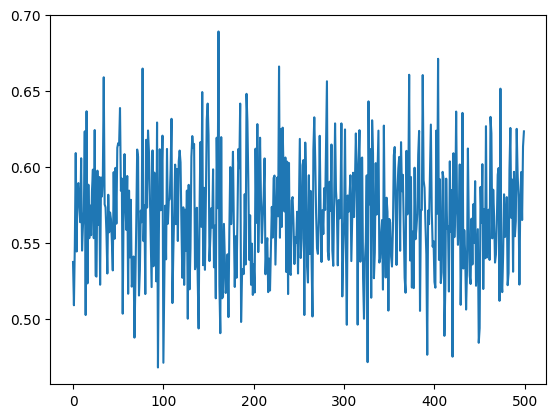

In [ ]:
# Evolution de l'accuracy
import matplotlib.pyplot as plt

plt.plot(range(500), acc)
plt.show()

In [ ]:
# Prédiction
y_pred = model.predict(X_test)
y_pred

[1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [ ]:
# Score du modèle
accuracy_score(y_test, y_pred)

0.6351981351981352

In [ ]:
# Poids du modèle
model.weights

[2.0460847638403026,
 0.5441388402494316,
 1.7463263838828418,
 0.5600503145315016,
 -0.5435479669498988,
 1.0498692754784789,
 1.977294686372808,
 -1.030098862731016,
 -2.426301358715242,
 1.6276342001301038,
 2.0784602671941497,
 3.484525704122577]

In [ ]:
model.bias

-2.7295661631987267

# 3. Multi Layer Perceptron (MLP) - Réseaux de neurones artificiels


Un Multi Layer Perceptron (MLP) est un réseau de neurones artificiels composé de plusieurs couches de perceptron, où chaque neurone d'une couche est connecté à tous les neurones de la couche suivante. Les couches intermédiaires entre la couche d'entrée et la couche de sortie sont appelées couches cachées.

Chaque neurone d'un MLP utilise une fonction d'activation non linéaire pour transformer la somme pondérée des signaux d'entrée en une sortie. Les poids et les biais de chaque neurone sont appris par rétropropagation (backpropagation) lors de l'entraînement du réseau à partir d'un ensemble de données d'entraînement.

<img src='https://raw.githubusercontent.com/ECE-Engineer/TensorFlow-Multilayer-Perceptron/master/MLP.png'>

Un réseau de neuronnes est  caractérisé par : 
- le nombre de couches qu'il contient, 
- le nombre de neurones par couche,
- la fonction d'activation utilisée par chaque neurone.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/TensorFlow_logo.svg/1200px-TensorFlow_logo.svg.png'>

[TensorFlow](https://www.tensorflow.org/) est une bibliothèque open source de calcul numérique et de machine learning, développée par Google Brain Team. Elle permet de créer et d'entraîner des de deeplearning  pour diverses tâches telles que la classification, la reconnaissance d'image, la détection d'objet, la segmentation d'image, la génération de texte et bien plus encore. 

Les modèles de deeplearning sont créés en assemblant des couches de neurones et en ajustant les poids de ces neurones lors de l'entraînement pour améliorer les performances du modèle. TensorFlow est utilisé dans de nombreuses industries et domaines, tels que la reconnaissance vocale, la robotique, la vision par ordinateur, la biologie, la finance, etc.

In [ ]:
import tensorflow as tf
import numpy as np

class MultiLayerPerceptron:
    def __init__(self, input_dim, output_dim):

        # On crée un modèle séquentiel
        self.model = tf.keras.models.Sequential() 

        # Première couche cachée de 3 neurones
        self.model.add(tf.keras.layers.Dense(3, input_dim=input_dim, activation='sigmoid'))

        # Deuxième couche cachée de 3 neurones
        self.model.add(tf.keras.layers.Dense(3, activation='sigmoid'))

        # Couche de sortie de 10 neurones
        self.model.add(tf.keras.layers.Dense(output_dim, activation='sigmoid'))

    
model = MultiLayerPerceptron(10, 1).model
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

### Exercice : Entrainement d'un MLP à l'aide de TensorFlow

Entrainez le modèle présenté ci-desus sur l'ensemble de données `Bank marketing response predict`.